# Task 1.Working with data

## Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercices

1.1 Download the data set movie_metadata.csv, which contains data about films from IMDb
(Internet Movie Database).

In [3]:
df = pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0$,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0$,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0$,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0$,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,0.0$,NaN,12.0,7.1,NaN,0


In [4]:
#There are duplicaed rows and I will remove them to obtain the metrics

print(f"There are {df[df.duplicated()].shape[0]} duplicated rows that will be removed")

df = df[~df.duplicated()]

There are 45 duplicated rows that will be removed


In [5]:
# There are still duplicated rows for some movies:

df['movie_title'] = df['movie_title'].str.replace('\xa0', '')
df[(df.movie_title == 'Pan') & (df['director_name'] == 'Joe Wright')]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
145,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,...,186.0,English,USA,PG,150000000.0$,2015.0,548.0,5.8,2.35,24000
3879,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,...,186.0,English,USA,PG,150000000.0$,2015.0,559.0,5.8,2.35,24000


In [6]:
# I will remove the duplicated mrows with same movie, director and title_year

print(f"There are {df[df.duplicated(subset = ['director_name','movie_title','title_year'])].shape[0]} duplicated rows that will be removed")

df = df[~df.duplicated(subset = ['director_name','movie_title','title_year'])]

There are 79 duplicated rows that will be removed


1.2. The duration column contains data on the film length. How many missing values are there in this column?

In [7]:
num_nans = df[df['duration'].isnull()].shape[0]

print(f"There are {num_nans} NaN values in the column 'duration'")

There are 15 NaN values in the column 'duration'


1.3. Replace the missing values in the duration column with the median value for this column.

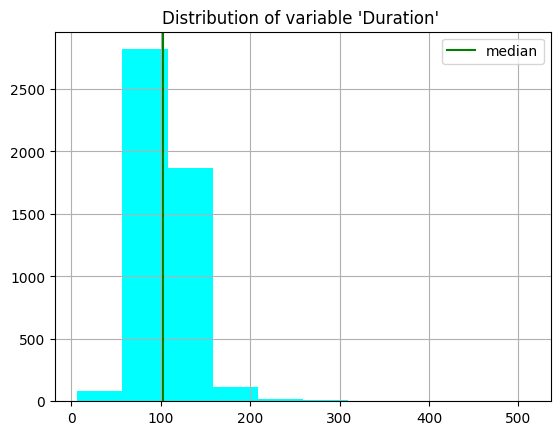

In [9]:
median_duration = df['duration'].median()

plt.hist(df['duration'], color = 'cyan' )
plt.axvline (x = median_duration, color = 'green', label = 'median')
plt.title("Distribution of variable 'Duration' ")
plt.grid()
plt.legend()
plt.show()

In [10]:
# Replacement

df['duration'] = df['duration'].fillna(median_duration)

1.4. What is the average film length? Give the answer as a floating-point figure rounded to
two decimal places.

In [11]:
average_duration = df['duration'].mean()

print(f"The average duration is {average_duration:.2f} minutes ")

The average duration is 107.08 minutes 


1.5. Create a movie_duration_category column, which will contain three categories
depending on the film length:

In [12]:
df.loc[:,'movie_duration_category'] = "1. <90"
df.loc[df['duration'].between(90,120), 'movie_duration_category'] = "2. 90–120"
df.loc[df['duration'] > 120, 'movie_duration_category'] = "3. >120"

df['movie_duration_category'].value_counts()

2. 90–120    3099
3. >120      1039
1. <90        781
Name: movie_duration_category, dtype: int64

1.6. Build a summary table for films released after 2000 (inclusively), to list the numbers of films:

• Table rows: year

• Table columns: movie duration category ("<90", "90–120", ">120")

• The year of release should be displayed in the YYYY format.

In [13]:
df_filmAfter2000s = df[df['title_year'] >= 2000].copy()
df_filmAfter2000s['title_year'] = df_filmAfter2000s['title_year'].astype(int)

summary_table = df_filmAfter2000s.groupby(['title_year','movie_duration_category']).agg(count = ("duration","count"))

summary_table_pivot = pd.pivot_table(summary_table , values = 'count', index = 'title_year', columns = 'movie_duration_category')

summary_table_pivot.head()

movie_duration_category,1. <90,2. 90–120,3. >120
title_year,,,
2000,25,110,34
2001,29,116,38
2002,33,144,27
2003,31,108,30
2004,30,136,41


1.7. How many films between 90 minutes and two hours long were released in 2008?

In [17]:
filmsReleased2008 = df[(df['duration'].between(90,120)) & (df['title_year'] == 2008)]

print(f'There were {filmsReleased2008.shape[0]} films between 90 minutes and two hours released in 2008')

There were 159 films between 90 minutes and two hours released in 2008


1.8. The plot_keywords column holds keywords characterizing the film's plot. Using the data
in this column, create a column called movie_plot_category, to contain four categories
depending on the key words in the column:

• Category "love_and_death" if the keywords include both "love" and "death"

• Category "love" if the keywords include the word "love"

• Category "death" if the keywords include the word "death"

• Category "other" if the keywords do not meet the conditions above

In [18]:
df['plot_keywords']

0                  avatar|future|marine|native|paraplegic
1       goddess|marriage ceremony|marriage proposal|pi...
2                     bomb|espionage|sequel|spy|terrorist
3       deception|imprisonment|lawlessness|police offi...
4                                                     NaN
                              ...                        
5038               fraud|postal worker|prison|theft|trial
5039         cult|fbi|hideout|prison escape|serial killer
5040                                                  NaN
5041                                                  NaN
5042    actress name in title|crush|date|four word tit...
Name: plot_keywords, Length: 4919, dtype: object

In [19]:
# First I transform the data from this column into arrays

df['plot_keywords_proc'] = df['plot_keywords'].str.split(pat = '|')

df['plot_keywords_proc'] 

0            [avatar, future, marine, native, paraplegic]
1       [goddess, marriage ceremony, marriage proposal...
2               [bomb, espionage, sequel, spy, terrorist]
3       [deception, imprisonment, lawlessness, police ...
4                                                     NaN
                              ...                        
5038         [fraud, postal worker, prison, theft, trial]
5039    [cult, fbi, hideout, prison escape, serial kil...
5040                                                  NaN
5041                                                  NaN
5042    [actress name in title, crush, date, four word...
Name: plot_keywords_proc, Length: 4919, dtype: object

In [20]:
def find_words_category(keywords:list, words: list):

    """
    This function receives an array,
    filters it using a list of words and returns
    the category.
    
    """

    if (isinstance(keywords, float)) and (pd.isna(keywords)):
        return np.nan

    keywords = [word for word in keywords if word in words]

    if keywords:
        if len(keywords) ==2:
            return "love_and_death"
        elif (len(keywords) ==1) & (keywords[0]=='love'):
            return "love"
        elif (len(keywords) ==1) & (keywords[0]=='death'):
            return "death"
    else:
        return "other"


In [21]:
words = ['love','death']

df['movie_plot_category'] = df['plot_keywords_proc'].apply(lambda x: find_words_category(x,words))

1.9. The imdb_score column shows a viewer rating for the film. Build a table to reflect the
average rating of films depending on which movie_plot_category category they belong to.

In [22]:
average_rating = df.groupby('movie_plot_category').aggregate(mean = ('imdb_score' , "mean")).reset_index()
average_rating

,movie_plot_category,mean
0,death,6.495868
1,love,6.553552
2,love_and_death,6.537500
3,other,6.443187


1.10. What is the average rating of films in the "love" category? Give the answer as a floating point figure rounded to two decimal places.

In [23]:
average_rating_love = average_rating[average_rating['movie_plot_category'] == 'love']['mean'].values[0]

print(f"The average rating of films in the 'love' category is {average_rating_love:.2f}")

The average rating of films in the 'love' category is 6.55


1.11. The budget column contains the film's budget. What is the median budget for all the films listed? Give the answer as an integer.

In [24]:
median_budget = df['budget'].str.replace('$', '',regex=False)
median_budget = median_budget.astype('float').quantile(0.5)

print(f"The median budget is {int(median_budget)}")

The median budget is 15000000
